In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 🔄📊 Workflow: Data Migration and Analysis 🛠️🔍

# Workshop Workflow: Data Migration and Initial Analysis

This Python script is the first step in our workflow, focused on data migration and initial analysis with Pandas. Its function is to load data from a CSV file to verify its correct importation, using Pandas to read the file and visualize the first rows. This process ensures that the data are ready for the following phases of analysis, marking the start of our exploration and manipulation of data in the project.


## Libraries are imported for use with Python.

In [22]:
import configparser
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
from psycopg2 import sql

## CSV Import with Pandas

This code performs the following operations:

Imports the CSV file using the pandas library.
Verifies the correct loading of the data by using data.head() to display the first rows of the DataFrame.

In [23]:
# Ruta al archivo CSV
ruta_archivo = r"ETL_Workshop_01\candidates.csv"

# Leer el archivo CSV utilizando pandas
datos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(datos.head())

  First Name;Last Name;Email;Application Date;Country;YOE;Seniority;Technology;Code Challenge Score;Technical Interview Score
0  Bernadette;Langworth;leonard91@yahoo.com;2021-...                                                                         
1  Camryn;Reynolds;zelda56@hotmail.com;2021-09-09...                                                                         
2  Larue;Spinka;okey_schultz41@gmail.com;2020-04-...                                                                         
3  Arch;Spinka;elvera_kulas@yahoo.com;2020-10-01;...                                                                         
4  Larue;Altenwerth;minnie.gislason@gmail.com;202...                                                                         


## CSV Import with Pandas
This code performs the following operations:

Imports specifying ; as the delimiter.
Verifies the correct loading of the data by using data.head() to display the first rows of the DataFrame.

In [24]:
# Ruta al archivo CSV
ruta_archivo = r"ETL_Workshop_01\candidates.csv"

# Leer el archivo CSV utilizando pandas y especificando el delimitador correcto
datos = pd.read_csv(ruta_archivo, delimiter=';')

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(datos.head())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                         10  
2          

## CSV Loading

- Define the path to the file `candidates.csv`.
- Load the file into a DataFrame with `pd.read_csv`, using `;` as the delimiter.

## Data Verification

- Display the first rows with `data.head()` for initial inspection.

## Data Filtering

- **By Country:** Filter candidates from `'Norway'`.
- **By Score:** Select those with a technical score > 8.

## Results

- Print the filtered DataFrames to visualize the selected candidates.


In [25]:
# Ruta al archivo CSV
ruta_archivo = r"ETL_Workshop_01\candidates.csv"

# Leer el archivo CSV utilizando pandas y especificando el delimitador correcto
datos = pd.read_csv(ruta_archivo, delimiter=';')

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print("Datos iniciales:")
print(datos.head())

# Filtrar candidatos de un país específico, por ejemplo, 'Norway'
candidatos_noruega = datos[datos['Country'] == 'Norway']

# Filtrar candidatos con una puntuación técnica superior a 8
candidatos_alta_puntuacion = datos[datos['Technical Interview Score'] > 8]

# Mostrar los resultados de los filtrados
print("\nCandidatos de Norway:")
print(candidatos_noruega)

print("\nCandidatos con puntuación técnica superior a 8:")
print(candidatos_alta_puntuacion)

Datos iniciales:
   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                        

# Database Table Creation with Python

1. **Configuration Reading:** Uses `configparser` to read the database connection configuration from a `db_config.ini` file. It obtains crucial details such as the database name, user, password, host, and port.

2. **Variable Initialization:** Initializes `cur` (cursor) and `conn` (connection) variables to ensure their availability throughout the process.

3. **Connection Establishment and Cursor Creation:**
   - **Connection:** Establishes a connection to the database using the obtained parameters. The connection is essential for initiating a session between the application program and the database.
   - **Cursor:** Creates a cursor through the `cursor()` method of the connection object. The cursor is used to execute SQL commands and handle the resulting data.

4. **SQL Command Definition and Execution:** Defines and executes an SQL command to create a `candidates` table if it does not exist, specifying several columns to store candidate details.

5. **Changes Persistence:** Performs a `commit` of the changes to the database to ensure that the table creation operation is permanent.

6. **Exception Handling:** Catches and handles specific `psycopg2` exceptions in case errors arise during the process, printing the corresponding error message.

7. **Resource Closure:** In a `finally` block, closes the cursor and connection to release resources, ensuring they are properly closed whether the process was successful or an error occurred.

## Key Concepts

- **Cursor:** In databases, a cursor is a structure that allows traversing and manipulating the rows returned by SQL queries sequentially. It is essential for detailed operations on the data.

- **Connection:** Represents a session between an application program and a database. It is the channel through which the program sends queries and receives results from the database, established with specific connection parameters.


In [26]:
# Leer la configuración de la base de datos desde db_config.ini
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

# Inicializar variables para asegurar su disponibilidad en el bloque finally
cur = None
conn = None

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )

    # Crear un cursor
    cur = conn.cursor()

    # Comando SQL para crear la tabla
    create_table_query = """
    CREATE TABLE IF NOT EXISTS candidates (
        FirstName varchar(255),
        LastName varchar(255),
        Email varchar(255),
        ApplicationDate date,
        Country varchar(255),
        YOE int,
        Seniority varchar(255),
        Technology varchar(255),
        CodeChallengeScore int,
        TechnicalInterviewScore int
    );
    """

    # Ejecutar el comando para crear la tabla
    cur.execute(create_table_query)

    # Commit los cambios a la base de datos
    conn.commit()

    print("Tabla creada exitosamente en PostgreSQL")

except psycopg2.Error as e:
    print(f"Ocurrió un error al crear la tabla: {e}")

finally:
    # Cerrar el cursor y la conexión
    if cur:
        cur.close()
    if conn:
        conn.close()


Tabla creada exitosamente en PostgreSQL


# Import Data from CSV to PostgreSQL with Python

This script is a step-by-step guide to importing data from a CSV file into a table in a PostgreSQL database. The operation is carried out in several key stages, ensuring an efficient and organized data transfer.

## Initial Preparations

1. **Reading Configuration:** The process begins with reading connection parameters from a `db_config.ini` file using `configparser`. This includes information such as the database name, user, password, host, and port.

2. **Database Connection:** With these parameters, a connection to the PostgreSQL database is established and a cursor is created. This cursor will be essential for executing SQL commands later on.

## Data Importation

3. **Opening the CSV File:** The script locates and opens the specified CSV file in `csv_file_path`. It's important to adjust the path to the current environment and ensure that the delimiter in `csv.reader` matches the file's delimiter.

4. **Reading and Inserting Data:**
   - The first line of the CSV (usually the header) is skipped to prevent inserting it as a record in the database.
   - Each row from the CSV file is read and inserted into the `candidates` table in the database using an `INSERT` SQL statement. Each row value is passed as a parameter to the query, corresponding to the table columns.

## Completion and Cleanup

5. **Commit and Close:**
   - A `commit` is executed to make the changes in the database permanent.
   - The cursor and connection are closed to free resources and ensure the integrity of the session with the database.


In [27]:
# Leer la configuración de la base de datos desde db_config.ini
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

# Establecer conexión a la base de datos
conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)
cur = conn.cursor()

# Ruta al archivo CSV
csv_file_path = r'ETL_Workshop_01\candidates.csv'  # Asegúrate de ajustar esta ruta a tu entorno

# Abrir el archivo CSV para insertar datos
with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')  # Ajustar el delimitador a punto y coma
    next(reader)  # Saltar el encabezado del archivo CSV
    for row in reader:
        # Asegúrate de que la cantidad de placeholders (%s) coincida con el número de columnas de tu tabla
        cur.execute(
            "INSERT INTO candidates (FirstName, LastName, Email, ApplicationDate, Country, YOE, Seniority, Technology, CodeChallengeScore, TechnicalInterviewScore) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
            row
        )

# Hacer commit de los cambios y cerrar la conexión
conn.commit()
cur.close()
conn.close()

print("Datos insertados exitosamente desde el CSV a la base de datos.")

Datos insertados exitosamente desde el CSV a la base de datos.


# Quick Query in PostgreSQL with Python

This script demonstrates how to perform and process a basic query in PostgreSQL, extracting and displaying the first 30 records from the `candidates` table.

## Key Steps

1. **Setup:** Reads connection details from `db_config.ini` using `configparser` and establishes a connection to the PostgreSQL database with `psycopg2`.

2. **Query and Results:**
   - Executes `SELECT * FROM candidates LIMIT 30` to fetch the first 30 records.
   - Retrieves and displays the column names followed by each record, separating the values with ` | ` for clear visualization.

3. **Exception Handling and Closing:**
   - Catches errors during the query for failure management.
   - Closes the cursor and connection at the end to free up resources.


In [28]:
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Ejecutar una consulta para seleccionar los primeros 30 registros
    cur.execute("SELECT * FROM candidates LIMIT 30")

    # Obtener y preparar los resultados de la consulta para la visualización
    rows = cur.fetchall()
    
    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cur.description]
    
    # Imprimir los nombres de las columnas
    print(' | '.join(column_names))
    print('-' * (len(column_names) * 20))  # Ajusta el multiplicador según sea necesario para la longitud
    
    # Imprimir cada fila
    for row in rows:
        # Convertir todos los valores a string y concatenarlos con ' | '
        print(' | '.join(str(value) for value in row))

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


firstname | lastname | email | applicationdate | country | yoe | seniority | technology | codechallengescore | technicalinterviewscore
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Bernadette | Langworth | leonard91@yahoo.com | 2021-02-26 | Norway | 2 | Intern | Data Engineer | 3 | 3
Camryn | Reynolds | zelda56@hotmail.com | 2021-09-09 | Panama | 10 | Intern | Data Engineer | 2 | 10
Larue | Spinka | okey_schultz41@gmail.com | 2020-04-14 | Belarus | 4 | Mid-Level | Client Success | 10 | 9
Arch | Spinka | elvera_kulas@yahoo.com | 2020-10-01 | Eritrea | 25 | Trainee | QA Manual | 7 | 1
Larue | Altenwerth | minnie.gislason@gmail.com | 2020-05-20 | Myanmar | 13 | Mid-Level | Social Media Community Management | 9 | 7
Alec | Abbott | juanita_hansen@gmail.com | 2019-08-17 | Zimbabwe | 8 | Junior | Adobe Experience Manager | 2 | 9
Allison | J

# 🧹✨ Database Cleanup 🧹✨



## Database Connection and Query Execution

This code snippet is designed to establish a connection to a PostgreSQL database and execute a query to count the total number of rows in the `candidates` table. Here's a step-by-step explanation:

1. **Read Database Configuration**: Uses `configparser` to read the database connection details (such as database name, user, password, host, and port) from a `db_config.ini` file.

2. **Establish Database Connection**: Connects to the PostgreSQL database using the `psycopg2` library and the parameters obtained from the configuration file.

3. **Execute Query**: After establishing the connection, a cursor is created and a SQL query is executed to count the total number of rows in the `candidates` table.

4. **Retrieve and Display Results**: Retrieves the query result, which is the row count, and prints the total number of rows in the `candidates` table.

5. **Error Handling**: Includes error handling to catch and print any errors that occur during the database connection process or the execution of the query.

6. **Cleanup**: Ensures that the cursor and database connection are properly closed in a `finally` block, regardless of whether the operation was successful or if an error occurred.


In [29]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Ejecutar una consulta para contar el número total de filas en la tabla 'candidates'
    cur.execute("SELECT COUNT(*) FROM candidates")

    # Obtener el resultado de la consulta
    row_count = cur.fetchone()[0]

    # Imprimir la cantidad de filas
    print(f"Total de filas en la tabla 'candidates': {row_count}")

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


Total de filas en la tabla 'candidates': 50000


## Duplicate Row Removal in PostgreSQL

This code snippet performs the removal of duplicate rows in a specific table (`candidates`) of a PostgreSQL database, following these steps:

1. **Setup and Connection**: Starts by reading the database connection details from a `db_config.ini` file using `configparser`. Then, establishes a database connection with `psycopg2`, enabling `autocommit` to apply changes immediately without the need for an explicit commit.

2. **Initial Row Count**: Executes an SQL query to count the total number of rows in the `candidates` table before duplicate removal, displaying this number.

3. **Duplicate Removal**: Identifies and removes duplicate rows based on the combination of specific columns (such as `FirstName`, `LastName`, `Email`, etc.), keeping only one instance of each set of duplicated data. This is achieved through an SQL query that uses `NOT IN` to exclude the `ctid`s of rows that are not minimum within each group of duplicates.

4. **Post-Removal Count and Report**: After removing duplicates, counts the total rows in the `candidates` table again and calculates the number of rows removed. Displays the total number of rows after cleanup and the amount of duplicate rows removed.

5. **Error Handling and Cleanup**: Catches and displays any errors that may occur during the process. Safely closes the cursor and database connection, regardless of the outcome of the previous operations.

This code is useful for maintaining data integrity and optimizing storage in applications that rely on a PostgreSQL database, ensuring that the `candidates` table contains unique entries.


In [30]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    conn.autocommit = True
    cur = conn.cursor()

    # Paso 1: Contar el número total de filas en la tabla 'candidates'
    cur.execute("SELECT COUNT(*) FROM candidates")
    row_count_before = cur.fetchone()[0]
    print(f"Total de filas antes de la eliminación: {row_count_before}")

    # Paso 2: Identificar y eliminar filas duplicadas (excepto una)
    print("Eliminando filas duplicadas...")
    cur.execute("""
        DELETE FROM candidates
        WHERE ctid NOT IN (
            SELECT MIN(ctid)
            FROM candidates
            GROUP BY FirstName, LastName, Email, ApplicationDate, Country, YOE, Seniority, Technology, CodeChallengeScore, TechnicalInterviewScore
        )
    """)

    # Paso 3: Contar el número de filas después de eliminar duplicados
    cur.execute("SELECT COUNT(*) FROM candidates")
    row_count_after = cur.fetchone()[0]
    print(f"Total de filas después de la eliminación: {row_count_after}")

    # Paso 4: Mostrar mensaje de progreso
    rows_deleted = row_count_before - row_count_after
    print(f"Filas duplicadas eliminadas: {rows_deleted}")

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


Total de filas antes de la eliminación: 50000
Eliminando filas duplicadas...
Total de filas después de la eliminación: 50000
Filas duplicadas eliminadas: 0


## Unique Data Analysis and Null Count in the Database

This code snippet performs an analysis of unique values and counts of null data for several columns in a `candidates` table of a PostgreSQL database. It is detailed as follows:

1. **Read Database Configuration**: Imports `configparser` and `psycopg2`, and then uses `configparser` to read the database connection details from a `db_config.ini` file.

2. **Establish Database Connection**: Uses `psycopg2` to connect to the PostgreSQL database using parameters (database name, user, password, host, port) obtained from the configuration file.

3. **Definition of Columns for Analysis**: Defines a list of columns (`'country'`, `'YOE'`, `'Seniority'`, `'Technology'`, `'CodeChallengeScore'`, `'TechnicalInterviewScore'`) for which to obtain unique values and count nulls.

4. **Execution of Queries by Column**:
   - For each specified column, executes an SQL query that selects the unique values of that column in the `candidates` table, groups these values, and counts the occurrences of each, ordering the results by the column.
   - Prints the unique values and their count of repetitions for each column.
   - Executes an additional query to count the number of null entries in each column and prints it.

5. **Error Handling**: Catches and displays any error that occurs during the execution of the database queries.

6. **Cleanup**: Ensures the closing of the cursor and disconnection from the database in a `finally` block, guaranteeing that these steps are performed regardless of the success or failure of the previous operations.


In [31]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Lista de columnas para las cuales queremos obtener valores únicos y contar los nulos
    columns = [ 'country', 'YOE', 'Seniority', 'Technology', 'CodeChallengeScore', 'TechnicalInterviewScore']

    # Iterar a través de cada columna y obtener sus valores únicos junto con sus recuentos
    for column in columns:
        print(f"\nValores únicos para {column} (incluyendo cantidad de repeticiones):")
        cur.execute(f"""
            SELECT {column}, COUNT(*)
            FROM candidates
            GROUP BY {column}
            ORDER BY {column}
        """)
        for value, count in cur.fetchall():
            print(f"{value}: {count} veces")

        # Contar los datos nulos para la columna actual
        # Modificamos la consulta para omitir la comparación con una cadena vacía para columnas numéricas
        cur.execute(f"SELECT COUNT(*) FROM candidates WHERE {column} IS NULL")
        blank_count = cur.fetchone()[0]
        print(f"Datos nulos para {column}: {blank_count}")

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()




Valores únicos para country (incluyendo cantidad de repeticiones):
Afghanistan: 197 veces
Albania: 200 veces
Algeria: 185 veces
American Samoa: 182 veces
Andorra: 192 veces
Angola: 229 veces
Anguilla: 190 veces
Antarctica (the territory South of 60 deg S): 185 veces
Antigua and Barbuda: 206 veces
Argentina: 221 veces
Armenia: 175 veces
Aruba: 203 veces
Australia: 208 veces
Austria: 187 veces
Azerbaijan: 194 veces
Bahamas: 198 veces
Bahrain: 186 veces
Bangladesh: 204 veces
Barbados: 197 veces
Belarus: 213 veces
Belgium: 193 veces
Belize: 198 veces
Benin: 181 veces
Bermuda: 206 veces
Bhutan: 210 veces
Bolivia: 215 veces
Bosnia and Herzegovina: 203 veces
Botswana: 203 veces
Bouvet Island (Bouvetoya): 224 veces
Brazil: 204 veces
British Indian Ocean Territory (Chagos Archipelago): 218 veces
Brunei Darussalam: 194 veces
Bulgaria: 204 veces
Burkina Faso: 182 veces
Burundi: 211 veces
Cambodia: 226 veces
Cameroon: 196 veces
Canada: 207 veces
Cape Verde: 172 veces
Cayman Islands: 207 veces
Cen

```markdown
# ✨📊 Standardization and Visualization of Value Metrics 🎯 According to Specific Requirements🧹
```

## Advanced Query and Data Visualization of Candidates

This code snippet demonstrates how to perform an advanced query in a PostgreSQL database, adding conditional logic to generate a new field `IsHired` based on evaluation criteria, and how to visualize these data. The process is detailed below:

1. **Importation of Necessary Modules**: `configparser` for reading configuration files and `psycopg2` for interacting with PostgreSQL are imported.

2. **Reading Database Configuration**: The `db_config.ini` file is read using `configparser` to obtain the necessary details for database connection (name, user, password, host, port).

3. **Establishing Connection**: A connection to the PostgreSQL database is established using the parameters obtained from the configuration file.

4. **Executing Query with Conditional Logic**:
   - A query is performed that selects several columns from the `candidates` table, including `firstname`, `lastname`, `email`, `applicationdate`, `country`, `yoe` (years of experience), `seniority`, `technology`, `codechallengescore`, and `technicalinterviewscore`.
   - A conditional column `IsHired` is added which evaluates whether a candidate is hired (`1`) or not (`0`), based on the scores of `codechallengescore` and `technicalinterviewscore`, using a threshold value of 7 for both.
   - The result is limited to the first 30 records.

5. **Visualization of Results**:
   - The query results are retrieved and prepared for visualization.
   - The names of the columns are obtained and printed.
   - The divider is adjusted to match the length including the new column `IsHired`.
   - The data for each row are printed, formatting and concatenating all the values as strings separated by ` | `.

6. **Error Handling and Cleanup**: 
   - Captures any error that might occur during the database query and prints the error message.
   - Ensures proper closing of the cursor and disconnection from the database in a `finally` block, regardless of the outcome of the previous operations.



In [32]:
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Modificar la consulta para incluir una columna 'IsHired' que indica si el candidato está contratado con valores 0 y 1
    cur.execute("""
    SELECT firstname, lastname, email, applicationdate, country, yoe, seniority, technology, codechallengescore, technicalinterviewscore,
    CASE
        WHEN codechallengescore >= 7 AND technicalinterviewscore >= 7 THEN 1
        ELSE 0
    END AS "IsHired"
    FROM candidates
    LIMIT 30
    """)

    # Obtener y preparar los resultados de la consulta para la visualización
    rows = cur.fetchall()
    
    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cur.description]
    
    # Imprimir los nombres de las columnas
    print(' | '.join(column_names))
    print('-' * (len(column_names) + 1) * 20)  # Ajuste del multiplicador para la longitud incluyendo la nueva columna
    
    # Imprimir cada fila
    for row in rows:
        # Convertir todos los valores a string y concatenarlos con ' | '
        print(' | '.join(str(value) for value in row))

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()



firstname | lastname | email | applicationdate | country | yoe | seniority | technology | codechallengescore | technicalinterviewscore | IsHired
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Bernadette | Langworth | leonard91@yahoo.com | 2021-02-26 | Norway | 2 | Intern | Data Engineer | 3 | 3 | 0
Camryn | Reynolds | zelda56@hotmail.com | 2021-09-09 | Panama | 10 | Intern | Data Engineer | 2 | 10 | 0
Larue | Spinka | okey_schultz41@gmail.com | 2020-04-14 | Belarus | 4 | Mid-Level | Client Success | 10 | 9 | 1
Arch | Spinka | elvera_kulas@yahoo.com | 2020-10-01 | Eritrea | 25 | Trainee | QA Manual | 7 | 1 | 0
Larue | Altenwerth | minnie.gislason@gmail.com | 2020-05-20 | Myanmar | 13 | Mid-Level | Social Media Community Management | 9 | 7 | 1
Alec | Abbott | juanita_hansen@gmail.com | 2019-08-17 

## Generation of Technology Distribution Chart

This code snippet demonstrates how to establish a connection with a PostgreSQL database, execute a query to extract and count the distribution of technologies among candidates, and generate a pie chart visualizing this distribution. The details are as follows:

1. **Read Database Configuration**: Through `configparser`, the database connection details (name, user, password, host, and port) are read from the `db_config.ini` file.

2. **Database Connection**: Uses `psycopg2` to connect to the PostgreSQL database using the previously read configuration.

3. **Query and Data Extraction**: A cursor is created, and an SQL query is executed to select and count the entries by technology in the `candidates` table, grouping them by technology and ordering them in descending order by count.

4. **Data Preparation for Visualization**: Iterates over the query results, storing the technologies and their respective counts in two lists. Special handling for cases where the technology is not specified.

5. **Generation and Visualization of Pie Chart**: Uses `matplotlib` to generate a pie chart showing the percentage distribution of technologies among candidates, with labels for each segment and a descriptive title.

6. **Error Handling**: Catches and prints any errors that occur during the execution of the query or the database connection.

7. **Resource Cleanup**: Closes the cursor and the database connection in a `finally` block, ensuring proper resource release regardless of the outcome of previous operations.


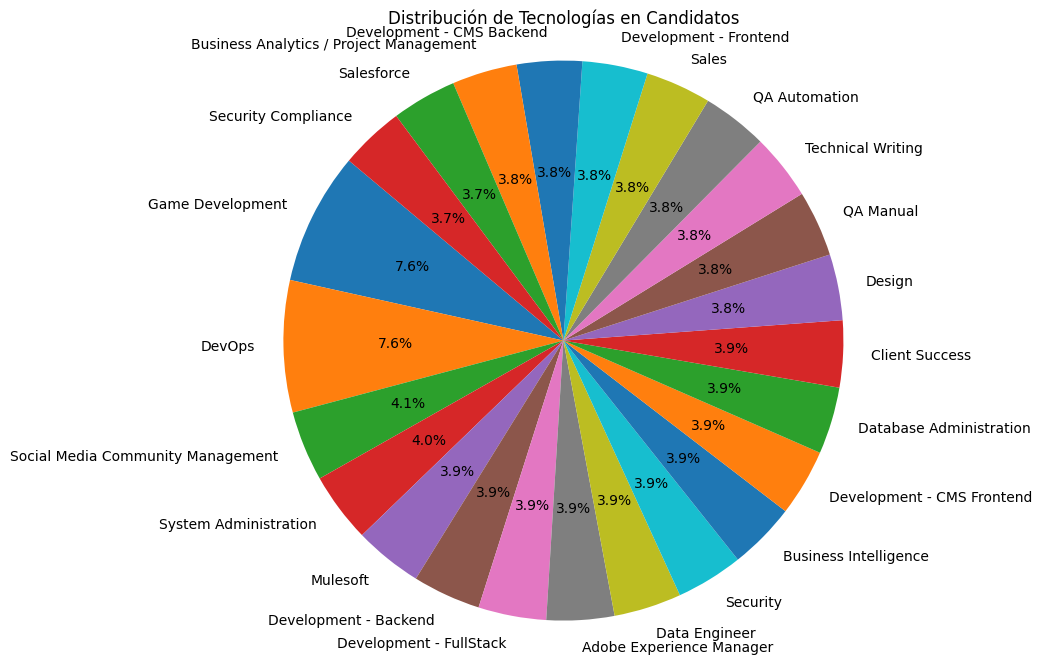

In [33]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

technologies = []
counts = []

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Extraer los datos de la columna 'Technology' y contarlos
    cur.execute("""
        SELECT Technology, COUNT(*)
        FROM candidates
        GROUP BY Technology
        ORDER BY COUNT(*) DESC
    """)
    
    for tech, count in cur.fetchall():
        technologies.append(tech if tech is not None else 'No especificado')
        counts.append(count)

    # Generar el gráfico de torta
    plt.figure(figsize=(10, 8))
    plt.pie(counts, labels=technologies, autopct='%1.1f%%', startangle=140)
    plt.title('Distribución de Tecnologías en Candidatos')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()

escribelo en ingles y en codigo markdown :## Generación de Gráfico de Distribución de Tecnologías

Este fragmento de código demuestra cómo establecer una conexión con una base de datos PostgreSQL, ejecutar una consulta para extraer y contar la distribución de tecnologías entre los candidatos, y generar un gráfico de torta que visualiza esta distribución. Se detalla a continuación:

1. **Leer Configuración de la Base de Datos**: A través de `configparser`, se leen los detalles de conexión de la base de datos (nombre, usuario, contraseña, host y puerto) desde el archivo `db_config.ini`.

2. **Conexión a la Base de Datos**: Utiliza `psycopg2` para conectar con la base de datos PostgreSQL usando la configuración leída previamente.

3. **Consulta y Extracción de Datos**: Se crea un cursor y se ejecuta una consulta SQL para seleccionar y contar las entradas por tecnología en la tabla `candidates`, agrupándolas por tecnología y ordenándolas en forma descendente por el conteo.

4. **Preparación de Datos para Visualización**: Recorre los resultados de la consulta, almacenando las tecnologías y sus respectivos conteos en dos listas. Se trata de forma especial el caso en que la tecnología no esté especificada.

5. **Generación y Visualización del Gráfico de Torta**: Utiliza `matplotlib` para generar un gráfico de torta que muestra la distribución porcentual de las tecnologías entre los candidatos, con etiquetas para cada segmento y un título descriptivo.

6. **Manejo de Errores**: Captura e imprime cualquier error que ocurra durante la ejecución de la consulta o la conexión a la base de datos.

7. **Limpieza de Recursos**: Cierra el cursor y la conexión a la base de datos en un bloque `finally`, asegurando la liberación adecuada de recursos sin importar el resultado de las operaciones previas.


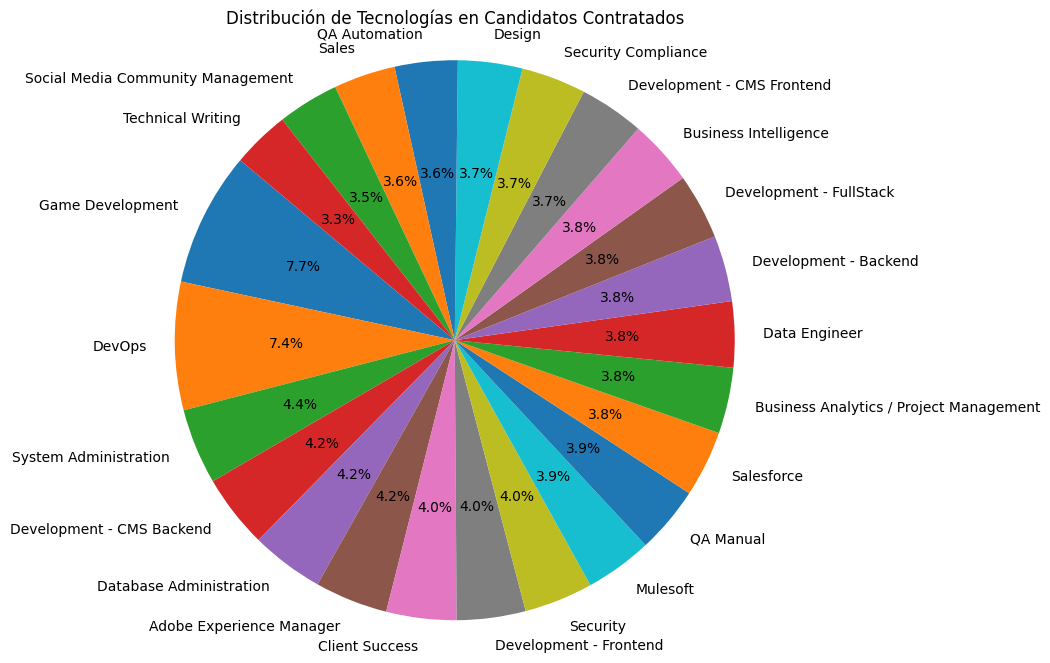

In [34]:
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

technologies = []
counts = []

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Modificar la consulta para extraer los datos solo de los candidatos contratados
    cur.execute("""
        SELECT Technology, COUNT(*)
        FROM candidates
        WHERE codechallengescore >= 7 AND technicalinterviewscore >= 7
        GROUP BY Technology
        ORDER BY COUNT(*) DESC
    """)
    
    for tech, count in cur.fetchall():
        technologies.append(tech if tech is not None else 'No especificado')
        counts.append(count)

    # Generar el gráfico de torta para solo los candidatos contratados
    plt.figure(figsize=(10, 8))
    plt.pie(counts, labels=technologies, autopct='%1.1f%%', startangle=140)
    plt.title('Distribución de Tecnologías en Candidatos Contratados')
    plt.axis('equal')  # El aspecto igual asegura que el pastel se dibuje como un círculo.
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


## Hired Candidates Analysis by Year

This code snippet is designed to connect to a PostgreSQL database, execute a specific query, and generate a horizontal bar chart showing the number of candidates hired per year. The execution is detailed below:

1. **Read Database Configuration**: Firstly, `configparser` is used to read the connection details (database name, user, password, host, and port) from a `db_config.ini` file.

2. **Establish Database Connection**: A connection to the PostgreSQL database is established using the parameters obtained from the configuration file with the help of the `psycopg2` library.

3. **Execute Selection Query**: Through the created cursor, a SQL query is executed to select the application year and count the candidates who have been hired based on certain criteria (code challenge and technical interview scores above 7), grouped by year.

4. **Data Collection for Visualization**: The results of the query are iterated through, storing the years and the count of hired candidates in separate lists, preparing them for visualization.

5. **Generation of Horizontal Bar Chart**: `matplotlib` is used to create a bar chart that visualizes the number of candidates hired per year. The details of the chart, such as axes, labels, and title, are adjusted for better data interpretation.

6. **Error Handling**: The code includes error handling to capture and report any issues that arise during the database connection or the execution of the query.

7. **Cleanup**: Finally, it ensures that both the cursor and the database connection are properly closed, regardless of the success of the previous operations.


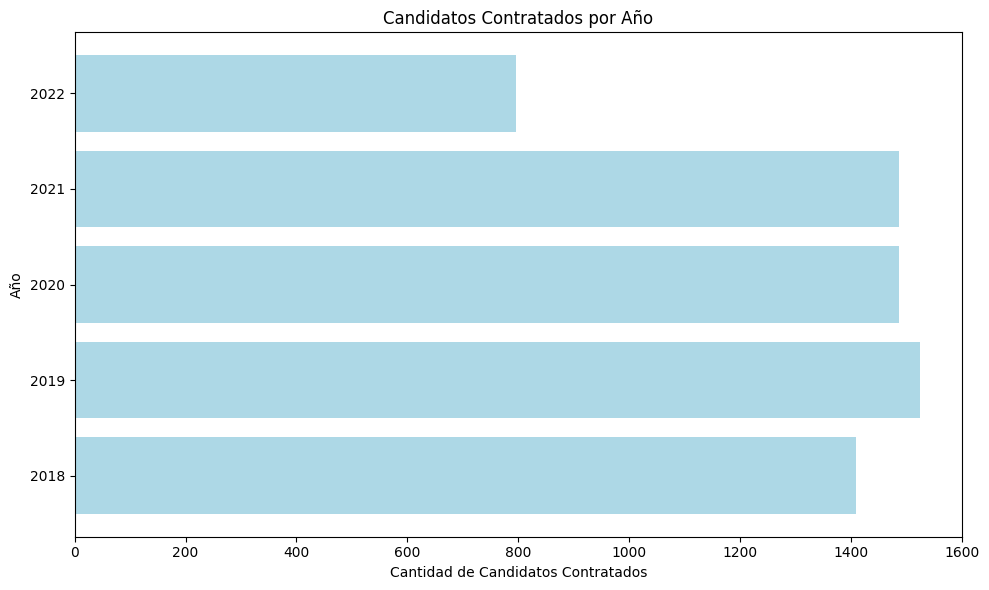

In [35]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

years = []
counts = []

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Modificar la consulta para incluir solo los candidatos contratados
    cur.execute("""
        SELECT EXTRACT(YEAR FROM ApplicationDate) AS Year, COUNT(*)
        FROM candidates
        WHERE codechallengescore >= 7 AND technicalinterviewscore >= 7
        GROUP BY Year
        ORDER BY Year
    """)
    
    for year, count in cur.fetchall():
        years.append(str(int(year)))  # Convertir año a string para mejor visualización en el eje
        counts.append(count)

    # Generar el gráfico de barras horizontales
    plt.figure(figsize=(10, 6))
    plt.barh(years, counts, color='lightblue')
    plt.xlabel('Cantidad de Candidatos Contratados')
    plt.ylabel('Año')
    plt.title('Candidatos Contratados por Año')
    plt.tight_layout()  # Ajustar automáticamente los subplots para que encajen en el área de la figura
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()



## Data Extraction and Visualization of Hires by Seniority

This code snippet performs the connection to a PostgreSQL database to extract and visualize the number of candidate hires, grouped by seniority, based on specific criteria. The step-by-step explanation is as follows:

1. **Read Database Configuration**: `configparser` is used to read the connection details (database name, user, password, host, port) from `db_config.ini`.

2. **Establish Database Connection**: The connection to PostgreSQL is established with the configuration parameters using `psycopg2`.

3. **Query Filtered Data**: An SQL query is executed to select the seniorities and count the hires of candidates who meet specific criteria of scoring in coding challenges and technical interviews, grouping the results by seniority and ordering them in descending order.

4. **Prepare Data for Visualization**: The query results are iterated to prepare the data of seniorities and their respective counts of hires, handling cases where the seniority is not specified.

5. **Data Visualization**: A vertical bar chart is generated using `matplotlib` to visualize the number of candidate hires by seniority, enhancing the presentation through adjustments in labels and chart layout.

6. **Error Handling and Cleanup**: Error handling for the database connection and query execution is included, and the proper closing of the cursor and connection is ensured in a `finally` block.


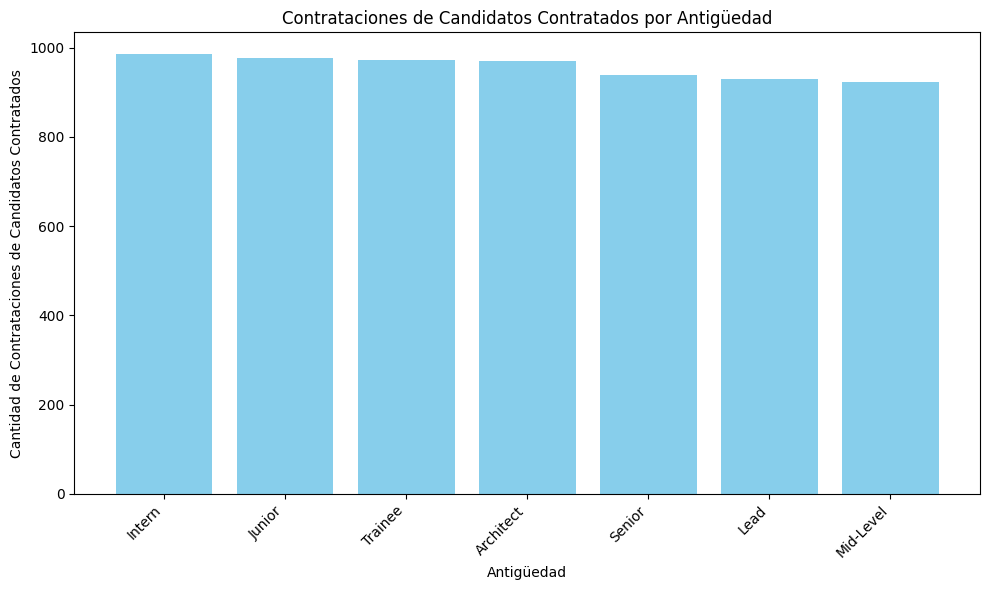

In [36]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

seniorities = []
counts = []

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Modificar la consulta para extraer las contrataciones por antigüedad solo de los candidatos contratados
    cur.execute("""
        SELECT Seniority, COUNT(*)
        FROM candidates
        WHERE codechallengescore >= 7 AND technicalinterviewscore >= 7
        GROUP BY Seniority
        ORDER BY COUNT(*) DESC
    """)
    
    for seniority, count in cur.fetchall():
        seniorities.append(seniority if seniority is not None else 'No especificado')
        counts.append(count)

    # Generar el gráfico de barras verticales
    plt.figure(figsize=(10, 6))
    plt.bar(seniorities, counts, color='skyblue')
    plt.xlabel('Antigüedad')
    plt.ylabel('Cantidad de Contrataciones de Candidatos Contratados')
    plt.title('Contrataciones de Candidatos Contratados por Antigüedad')
    plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para mejor visualización
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()



## Data Extraction and Visualization of Hiring by Country

This snippet of code performs data extraction of hiring by country over the years, only for hired candidates, from a PostgreSQL database. The process is detailed as follows:

1. **Read Database Configuration**: Uses `configparser` to read the database connection details from a `db_config.ini` file, including database name, user, password, host, and port.

2. **Establish Database Connection**: Uses `psycopg2` to connect to the PostgreSQL database using the read parameters.

3. **Initial Data Preparation**: Defines a list of countries of interest and prepares a dictionary to store the extracted data.

4. **Query and Data Extraction**: Executes an SQL query for each country of interest to extract the number of hires of hired candidates per year, filtering by a minimum score in `codechallengescore` and `technicalinterviewscore`. The data are grouped and ordered by year.

5. **Prepare Data for Visualization**: Combines the years from all countries to have a complete range of years and prepares the data for visualization, ensuring years without hires are considered with a value of 0.

6. **Graph Generation**: Creates a multi-line chart to visualize the number of hires by country over the years, using the `matplotlib` library. Sets up labels, legend, and grids to enhance the understanding of the chart.

7. **Error Handling**: Includes error handling to capture and print any errors during the database query.

8. **Cleanup**: Closes the cursor and the database connection properly in a `finally` block, ensuring the release of resources regardless of the success or failure of previous operations.



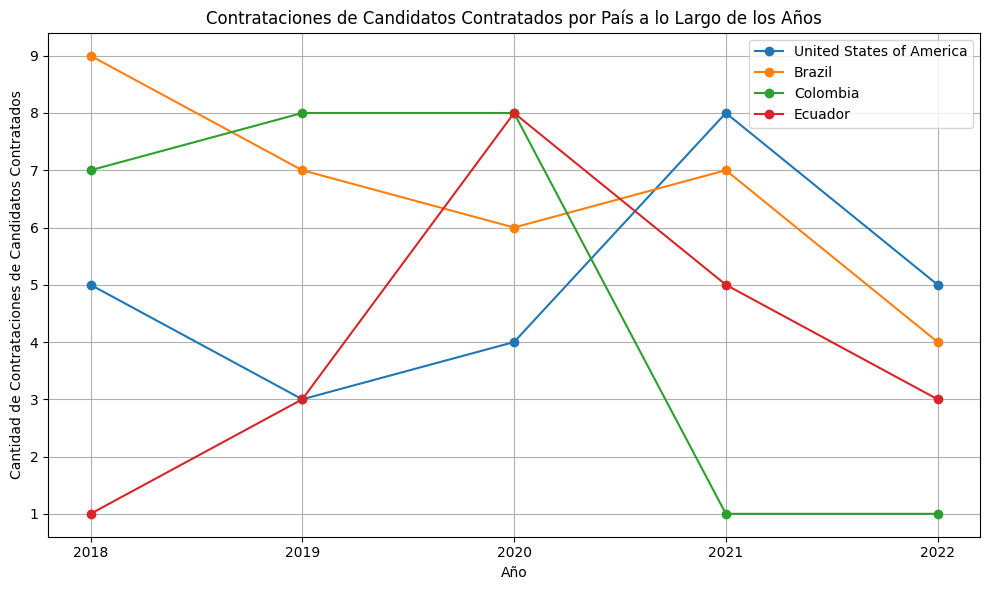

In [37]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

countries = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
data = {country: {} for country in countries}

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Extraer las contrataciones por país a lo largo de los años SOLO para los candidatos contratados
    for country in countries:
        cur.execute(f"""
            SELECT EXTRACT(YEAR FROM ApplicationDate) AS Year, COUNT(*)
            FROM candidates
            WHERE Country = %s AND codechallengescore >= 7 AND technicalinterviewscore >= 7
            GROUP BY Year
            ORDER BY Year
        """, (country,))
        
        for year, count in cur.fetchall():
            # Asegurarse de que el año sea un entero para evitar problemas de tipo
            data[country][int(year)] = count

    # Preparar datos para el gráfico
    all_years = set()
    for country_data in data.values():
        all_years.update(country_data.keys())
    all_years = sorted(all_years)

    # Generar el gráfico de líneas múltiples
    plt.figure(figsize=(10, 6))
    for country, yearly_data in data.items():
        counts = [yearly_data.get(year, 0) for year in all_years]  # Usar 0 para años sin datos
        plt.plot(all_years, counts, marker='o', label=country)

    plt.xlabel('Año')
    plt.ylabel('Cantidad de Contrataciones de Candidatos Contratados')
    plt.title('Contrataciones de Candidatos Contratados por País a lo Largo de los Años')
    plt.legend()
    plt.grid(True)
    plt.xticks(all_years)  # Usar all_years directamente asegura compatibilidad de tipos
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()

